# Wine Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df1 = pd.read_csv('wine_data1.csv')

In [3]:
df1.info()
#target + 13 feature variables
#7 variables with NO nulls: price, name, brand, country_state, varietial, wine_adv_rating, customer_total_ratings
#4 variables already tagged as numeric
#for price variable the commas need to be removed & then variable can be updated to numeric data type
#9 categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              595 non-null    int64  
 1   price                   595 non-null    object 
 2   name                    595 non-null    object 
 3   brand                   595 non-null    object 
 4   country_state           595 non-null    object 
 5   region                  563 non-null    object 
 6   appellation             334 non-null    object 
 7   varietal                595 non-null    object 
 8   style                   406 non-null    object 
 9   abv                     227 non-null    float64
 10  taste                   407 non-null    object 
 11  body                    397 non-null    object 
 12  wine_adv_rating         595 non-null    int64  
 13  customer_avg_rating     319 non-null    float64
 14  customer_total_ratings  595 non-null    in

In [4]:
df1.price = df1.price.str.replace(',','')

In [5]:
df1.price = df1.price.astype(float)

In [6]:
df1.drop(df1.columns[0], axis = 1, inplace = True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   595 non-null    float64
 1   name                    595 non-null    object 
 2   brand                   595 non-null    object 
 3   country_state           595 non-null    object 
 4   region                  563 non-null    object 
 5   appellation             334 non-null    object 
 6   varietal                595 non-null    object 
 7   style                   406 non-null    object 
 8   abv                     227 non-null    float64
 9   taste                   407 non-null    object 
 10  body                    397 non-null    object 
 11  wine_adv_rating         595 non-null    int64  
 12  customer_avg_rating     319 non-null    float64
 13  customer_total_ratings  595 non-null    int64  
dtypes: float64(3), int64(2), object(9)
memory 

In [8]:
df1.head(6)

,price,name,brand,country_state,region,appellation,varietal,style,abv,taste,body,wine_adv_rating,customer_avg_rating,customer_total_ratings
0,19.99,"Chateau Roques Mauriac Bordeaux Superieur, 2015",Chateau Roques Mauriac,France,Bordeaux,Bordeaux/Bordeaux Superieur,Bordeaux Blend,Fresh,13.5,"Raspberry, Cinnamon",Medium-bodied,88,4.2,25
1,69.99,"Alta Nova Cabernet Napa, 2018",Alta Nova,California,Napa Valley,NaN,Cabernet Sauvignon,Concentrated,14.5,"Blackberry, Raspberry, Oak",Full-bodied,94,3.9,53
2,99.99,"Amici Cabernet Sauvignon Napa Reserve, 2019",Amici,California,Napa Valley,NaN,Cabernet Sauvignon,Concentrated,14.7,"Blackberry, Red Fruit",Full-bodied,96,4.4,75
3,44.99,"Stack House Cabernet Sauvignon Napa Valley, 2017",Stack House,California,Napa Valley,NaN,Cabernet Sauvignon,Concentrated,14.9,"Blackberry, Raspberry, Oak",Full-bodied,92,4.8,28
4,54.99,"Tether Cabernet Sauvignon Napa Valley , 2019",Tether,California,Napa Valley,NaN,Cabernet Sauvignon,Elegant,14.8,"Raspberry, Cherry",Full-bodied,92,4.4,34
5,49.99,"Titus Cabernet Sauvignon Napa Valley, 2014",Titus,California,Napa Valley,NaN,Cabernet Sauvignon,Concentrated,14.5,"Blackberry, Oak",Full-bodied,90,4.6,75


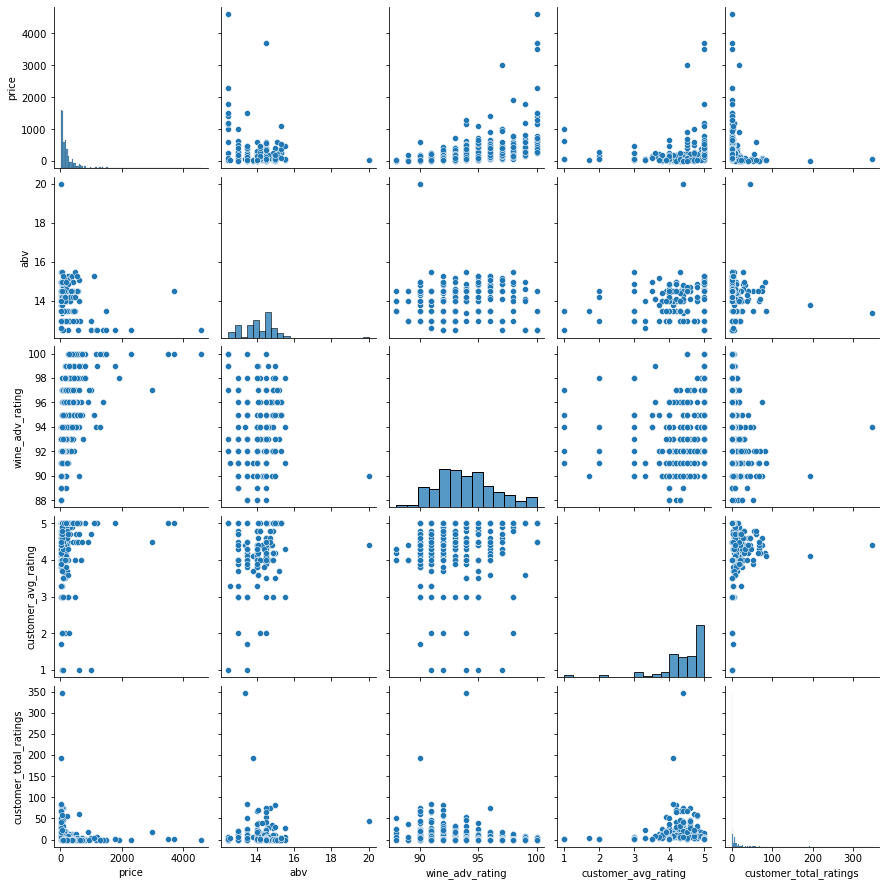

In [9]:
sns.pairplot(df1);

#### Outlier exploration based on pairplot:

In [10]:
df1[df1.price > 2800]
#top 4 most expensive wines

,price,name,brand,country_state,region,appellation,varietal,style,abv,taste,body,wine_adv_rating,customer_avg_rating,customer_total_ratings
129,3699.97,"Petrus Pomerol, 2015",Petrus,France,Bordeaux,Pomerol,Bordeaux Blend,Elegant,14.5,"Cassis, Black Currant, Smooth",Full-bodied,100,5.0,1
365,4599.99,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
397,2999.99,"Kathryn Hall Cabernet Napa, 2016",Hall,California,Napa Valley,Rutherford,Cabernet Sauvignon,Concentrated,NaN,"Cassis, Cherry, Cedar",Full-bodied,97,4.5,17
408,3499.97,"Scarecrow Cabernet Napa, 2014",Scarecrow,California,Napa Valley,NaN,Cabernet Sauvignon,Intense,NaN,"Cassis, Blackberry, Boysenberry",NaN,100,5.0,1


In [11]:
df1[df1.abv >= 15.5]
#1 outlier for abv at 20%

,price,name,brand,country_state,region,appellation,varietal,style,abv,taste,body,wine_adv_rating,customer_avg_rating,customer_total_ratings
6,22.99,"Pallas Old Vine Garnacha Special Selection , 2013",Pallas,Spain,Calatayud,NaN,Grenache,Elegant,15.5,"Black Fruit, Lavender",Medium-bodied,91,4.3,28
79,22.99,"Quinta das Carvalhas Reserva Douro, 2019",Quinta das Carvalhas,Portugal,Douro,NaN,Red Blend,Elegant,20.0,"Violet, Blackberry",Medium-bodied,90,4.4,44
98,57.99,"K Vintners Syrah The Beautiful, 2015",K Vintners,Washington,Columbia Valley,Walla Walla,Syrah/Shiraz,NaN,15.5,NaN,NaN,98,3.0,6
512,469.97,"Melka Metisse Cabernet Martinez, 2016",Melka,California,Napa Valley,NaN,Cabernet Sauvignon,Concentrated,15.5,"Red Fruit, Spice",Full-bodied,94,NaN,0


In [12]:
df1[df1.abv < 13]
#13 wines under 13% abv
#vast majority of wines are 13-15.5% abv

,price,name,brand,country_state,region,appellation,varietal,style,abv,taste,body,wine_adv_rating,customer_avg_rating,customer_total_ratings
21,999.97,"Chateau Lafite Rothschild Pauillac, 2017",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,97,1.0,1
118,47.99,"Castello Paneretta Terrine IGT, 2005",Castello della Paneretta,Italy,Tuscany,Toscana,Bordeaux Blend,Elegant,12.5,"Spice, Blackberry",Full-bodied,92,5.0,2
122,589.99,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
123,1399.97,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
125,1149.97,"Chateau Margaux Margaux, 2018",Chateau Margaux,France,Bordeaux,Margaux,Bordeaux Blend,Intense,12.5,"Raspberry, Blueberry, Oak",Full-bodied,100,5.0,5
355,239.97,"Carruades de Lafite Pauillac, 2008",Carruades de Lafite,France,Bordeaux,Pauillac,Bordeaux Blend,Elegant,12.5,"Blackberry, Currant",Medium-bodied,93,NaN,0
362,89.99,"Chateau Haut Bages Liberal Pauillac, 2010",Chateau Haut Bages Liberal,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cassis, Black Fruit",Full-bodied,92,5.0,1
364,2299.99,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
365,4599.99,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
366,1499.97,"Chateau Latour Pauillac, 2003",Chateau Latour,France,Bordeaux,Pauillac,Bordeaux Blend,Elegant,12.5,"Blackberry, Currant",Full-bodied,100,NaN,0


In [13]:
df1[df1.customer_total_ratings < 1]
#276 wines with 0 reviews, this matches exactly the number of nulls in "customer_avg_rating" column

,price,name,brand,country_state,region,appellation,varietal,style,abv,taste,body,wine_adv_rating,customer_avg_rating,customer_total_ratings
119,99.99,"Chateau Beau-Sejour Becot St Emilion, 2017",Chateau Beau-Sejour Becot,France,Bordeaux,Saint-Emilion,Bordeaux Blend,Concentrated,13.5,"Oak, Cherry, Raspberry",Full-bodied,96,NaN,0
122,589.99,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
123,1399.97,"Chateau Lafite Rothschild Pauillac, 2018",Chateau Lafite Rothschild,France,Bordeaux,Pauillac,Bordeaux Blend,Concentrated,12.5,"Cherry, Dark Berry, Oak",Full-bodied,100,NaN,0
132,69.99,"Aquilini Red Mountain Cabernet Sauvignon, 2017",Aquilini,Washington,Columbia Valley,Red Mountain,Cabernet Sauvignon,NaN,NaN,NaN,NaN,97,NaN,0
133,639.97,Beringer 8th Maker Cabernet Sauvignon Napa Val...,Beringer,California,Napa Valley,NaN,Cabernet Sauvignon,Concentrated,NaN,"Blackberry, Coffee, Herbes de Provence",Full-bodied,95,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,93.99,"DuMOL Syrah Jack Roberts, 2013",DuMOL,California,NaN,NaN,Syrah/Shiraz,NaN,NaN,NaN,NaN,92,NaN,0
588,144.99,"Vinedos de Paganos La Nieta, 2016",Vinedos de Paganos,Spain,Rioja,NaN,Tannat,NaN,NaN,NaN,NaN,98,NaN,0
589,61.99,"Artadi Rioja Valdegines, 2016",Artadi,Spain,Rioja,NaN,Tempranillo,NaN,14.5,NaN,NaN,94,NaN,0
591,209.99,"Cayuse Tempranillo Impulsivo, 2008",Cayuse Vineyards,Washington,Columbia Valley,Walla Walla,Tempranillo,NaN,NaN,NaN,NaN,91,NaN,0


In [14]:
df1[df1.customer_total_ratings > 100]
#top 2 wines w/ highest number of reviews

,price,name,brand,country_state,region,appellation,varietal,style,abv,taste,body,wine_adv_rating,customer_avg_rating,customer_total_ratings
15,49.99,"Amici Cabernet Sauvignon Napa, 2019",Amici,California,Napa Valley,NaN,Cabernet Sauvignon,Intense,13.4,"Blackberry, Vanilla, Spice",Full-bodied,94,4.4,347
52,13.99,"Atrevida Malbec, 2020",Atrevida,Argentina,NaN,NaN,Malbec,Elegant,13.8,"Mineral, Floral",Full-bodied,90,4.1,193


#### Initial test model (based on the 2 feature variables that are already numeric & have no nulls):

In [15]:
x_1 = df1[['wine_adv_rating','customer_total_ratings']] 
y_1 = df1.price

In [16]:
lr_1 = LinearRegression()
lr_1.fit(x_1, y_1)
lr_1.score(x_1, y_1)
#regular R^2
#24% of variance is explained!

0.24416268278640407

#### Data exploration for categorical values (useful for considering potential buckets with creating dummy variables):

In [17]:
df1.brand.value_counts()
#358 brands are represented within the data set
#data for this variable appears to be too widely dispersed for this to be valuable for predicting target

Delas                  16
Roy Estate             13
E. Guigal              11
Amici                   9
Fontodi                 9
                       ..
Davis Estates           1
Chateau Dalem           1
Chateau d'Armailhac     1
Chateau La Cabanne      1
Teso la Monja           1
Name: brand, Length: 358, dtype: int64

In [18]:
repeat_brands = df1.brand.value_counts().rename_axis('brand').reset_index(name='counts')
repeat_brands = repeat_brands[repeat_brands.counts > 1]
repeat_brands
#of the 358 brands, 110 of them appear multiple times in the dataframe

,brand,counts
0,Delas,16
1,Roy Estate,13
2,E. Guigal,11
3,Amici,9
4,Fontodi,9
...,...,...
105,Donnachiara,2
106,Hundred Acre,2
107,Chateau Fombrauge,2
108,Mitolo,2


In [19]:
df1.country_state.value_counts()
#only 14 different outputs

California      235
France          154
Italy            80
Spain            42
Washington       31
Australia        17
Argentina        12
Oregon            9
Portugal          6
Chile             4
South Africa      2
Israel            1
Bulgaria          1
New Zealand       1
Name: country_state, dtype: int64

In [20]:
df1.region.value_counts()
#38 regions with many singular values
#could be useful with top 5 as individual values & everything else bucketed as other?

Napa Valley          167
Bordeaux              71
Rhone                 65
Tuscany               45
Piedmont              30
Sonoma County         29
Columbia Valley       22
Burgundy              17
Rioja                 13
Central Coast         10
Ribera del Duero      10
Mendoza                9
Willamette Valley      9
Yakima Valley          8
Barossa                6
Santa Barbara          6
Toro                   6
McLaren Vale           5
Montsant               4
Douro                  4
Priorat                3
Mendocino              2
Maipo Valley           2
Campagnia              2
Alentejo               2
Monterey               2
Veneto                 2
Stellenbosch           2
Martinborough          1
Calatayud              1
Campo de Borja         1
Sicily                 1
La Mancha              1
Western Australia      1
Vins de Pays d'Oc      1
Limestone Coast        1
Carinena               1
Eden Valley            1
Name: region, dtype: int64

In [21]:
df1.appellation.value_counts()
#74 appellations
#like region may be useful to look at top 5?

Barolo                    17
Saint-Emilion             17
Pauillac                  16
Brunello di Montalcino    16
Chateauneuf-du-Pape       15
                          ..
Givry                      1
Dundee Hills               1
Margaret River             1
Lussac-Saint-Emilion       1
Volnay                     1
Name: appellation, Length: 74, dtype: int64

In [22]:
df1.varietal.value_counts()
#22 varietals

Cabernet Sauvignon      207
Bordeaux Blend           79
Rhone Blend              62
Pinot Noir               54
Sangiovese               35
Red Blend                35
Tempranillo              29
Syrah/Shiraz             27
Nebbiolo                 25
Merlot                   10
Malbec                    8
Zinfandel                 6
Grenache                  4
Mourvedre/Monastrell      3
Aglianico                 2
Corvina                   2
Graciano                  2
Nerello Mascalese         1
Barbera                   1
Cabernet Franc            1
Pinot Meunier             1
Tannat                    1
Name: varietal, dtype: int64

In [23]:
df1['style'].value_counts()
#7 styles

Concentrated    143
Elegant         129
Intense         110
Fresh            20
Oak               2
Dry               1
Crisp             1
Name: style, dtype: int64

In [24]:
df1.taste.value_counts()
#317 tastes
#data for this variable appears to be too widely dispersed for this to be valuable for predicting target

Cherry, Spice              7
Blackberry, Chocolate      5
Cherry, Dark Berry, Oak    5
Blackberry, Plum           4
Blackberry, Spice          4
                          ..
Cherry, Coffee             1
Cassis, Spice, Earth       1
Cherry, Cedar, Mocha       1
Dark Fruit, Blueberry      1
Strawberry, Cherry         1
Name: taste, Length: 317, dtype: int64

In [25]:
df1.body.value_counts()
#3 bodies

Full-bodied      289
Medium-bodied    106
Light-bodied       2
Name: body, dtype: int64

## Filling Nulls

In [26]:
df1 = df1.drop(['brand','taste'], axis=1)

In [27]:
df1.info()
#6 remaining feature columns with nulls- 4 are categorical & 2 are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   595 non-null    float64
 1   name                    595 non-null    object 
 2   country_state           595 non-null    object 
 3   region                  563 non-null    object 
 4   appellation             334 non-null    object 
 5   varietal                595 non-null    object 
 6   style                   406 non-null    object 
 7   abv                     227 non-null    float64
 8   body                    397 non-null    object 
 9   wine_adv_rating         595 non-null    int64  
 10  customer_avg_rating     319 non-null    float64
 11  customer_total_ratings  595 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 55.9+ KB


In [28]:
df1['region'].fillna('missing',inplace=True)

In [29]:
df1['appellation'].fillna('missing',inplace=True)

In [30]:
df1['style'].fillna('missing',inplace=True)

In [31]:
df1['body'].fillna('missing',inplace=True)

In [32]:
df1.abv.mean()

14.07577092511013

In [33]:
df1.abv.median()

14.1

In [34]:
#1 high outlier, but overall abv appears to be not very skewed & normally distributed, mean is a viable fill value for the nulls
df1['abv'].fillna(df1['abv'].mean(),inplace=True)

In [35]:
df1.customer_avg_rating.mean()

4.390595611285266

In [36]:
df1.customer_avg_rating.median()

4.5

In [37]:
#using mean as fill value for the other numeric feature column with nulls
df1['customer_avg_rating'].fillna(df1['customer_avg_rating'].mean(),inplace=True)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   595 non-null    float64
 1   name                    595 non-null    object 
 2   country_state           595 non-null    object 
 3   region                  595 non-null    object 
 4   appellation             595 non-null    object 
 5   varietal                595 non-null    object 
 6   style                   595 non-null    object 
 7   abv                     595 non-null    float64
 8   body                    595 non-null    object 
 9   wine_adv_rating         595 non-null    int64  
 10  customer_avg_rating     595 non-null    float64
 11  customer_total_ratings  595 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 55.9+ KB


## Creating Year Variable

In [39]:
df1['year'] = df1['name'].str.extract('(2\d\d\d)',expand=True)

In [40]:
df1.head()

,price,name,country_state,region,appellation,varietal,style,abv,body,wine_adv_rating,customer_avg_rating,customer_total_ratings,year
0,19.99,"Chateau Roques Mauriac Bordeaux Superieur, 2015",France,Bordeaux,Bordeaux/Bordeaux Superieur,Bordeaux Blend,Fresh,13.5,Medium-bodied,88,4.2,25,2015
1,69.99,"Alta Nova Cabernet Napa, 2018",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.5,Full-bodied,94,3.9,53,2018
2,99.99,"Amici Cabernet Sauvignon Napa Reserve, 2019",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.7,Full-bodied,96,4.4,75,2019
3,44.99,"Stack House Cabernet Sauvignon Napa Valley, 2017",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.9,Full-bodied,92,4.8,28,2017
4,54.99,"Tether Cabernet Sauvignon Napa Valley , 2019",California,Napa Valley,missing,Cabernet Sauvignon,Elegant,14.8,Full-bodied,92,4.4,34,2019


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   595 non-null    float64
 1   name                    595 non-null    object 
 2   country_state           595 non-null    object 
 3   region                  595 non-null    object 
 4   appellation             595 non-null    object 
 5   varietal                595 non-null    object 
 6   style                   595 non-null    object 
 7   abv                     595 non-null    float64
 8   body                    595 non-null    object 
 9   wine_adv_rating         595 non-null    int64  
 10  customer_avg_rating     595 non-null    float64
 11  customer_total_ratings  595 non-null    int64  
 12  year                    592 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 60.6+ KB


In [42]:
df1[pd.isnull(df1['year'])]
#only 1 real null + 2 wines from the 90s where code didn't apply

,price,name,country_state,region,appellation,varietal,style,abv,body,wine_adv_rating,customer_avg_rating,customer_total_ratings,year
531,729.99,"Shafer Cabernet Hillside Select, 1999",California,Napa Valley,missing,Cabernet Sauvignon,missing,14.075771,missing,93,4.390596,0,NaN
555,15.49,"Locations by Dave Phinney """"ES""""",Spain,missing,missing,Red Blend,Fresh,14.075771,Medium-bodied,93,4.700000,21,NaN
581,374.99,"Fontodi Flaccianello della Pieve, 1999",Italy,Tuscany,Toscana,Sangiovese,missing,14.075771,missing,94,4.390596,0,NaN


In [43]:
#need to view subset without nulls to change to integer type so I can figure out what to value to inpute for Dave Phinney wine
temp_year = df1[pd.notnull(df1['year'])]
temp_year.year = temp_year.year.astype(int)
temp_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 594
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   592 non-null    float64
 1   name                    592 non-null    object 
 2   country_state           592 non-null    object 
 3   region                  592 non-null    object 
 4   appellation             592 non-null    object 
 5   varietal                592 non-null    object 
 6   style                   592 non-null    object 
 7   abv                     592 non-null    float64
 8   body                    592 non-null    object 
 9   wine_adv_rating         592 non-null    int64  
 10  customer_avg_rating     592 non-null    float64
 11  customer_total_ratings  592 non-null    int64  
 12  year                    592 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 64.8+ KB


/home/hswan/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
#now that I found the value in the temp df I can apply it to the null in the regular df
temp_year.year.mean()

2014.3192567567567

In [45]:
df1.loc[555,['year']] = 2014

In [46]:
df1.loc[555,['year']]

year    2014
Name: 555, dtype: object

In [47]:
df1.loc[531,['year']] = 1999
df1.loc[581,['year']] = 1999

In [48]:
df1.year = df1.year.astype(int)

In [49]:
df1.info()
#nulls successfully removed from year column & datatype modified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   595 non-null    float64
 1   name                    595 non-null    object 
 2   country_state           595 non-null    object 
 3   region                  595 non-null    object 
 4   appellation             595 non-null    object 
 5   varietal                595 non-null    object 
 6   style                   595 non-null    object 
 7   abv                     595 non-null    float64
 8   body                    595 non-null    object 
 9   wine_adv_rating         595 non-null    int64  
 10  customer_avg_rating     595 non-null    float64
 11  customer_total_ratings  595 non-null    int64  
 12  year                    595 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 60.6+ KB


## Creating Dummy Variables

In [50]:
df1['no_appellation'] = (df1['appellation']=='missing').astype(int)
#1  will be no appellation, 0 will be HAS appellation

In [51]:
df1.no_appellation.sum()
#this number makes sense, I filled 261 nulls earlier

261

In [52]:
cs_count = df1.country_state.value_counts()
cs_count

California      235
France          154
Italy            80
Spain            42
Washington       31
Australia        17
Argentina        12
Oregon            9
Portugal          6
Chile             4
South Africa      2
Israel            1
Bulgaria          1
New Zealand       1
Name: country_state, dtype: int64

In [53]:
other_cs_list = list(cs_count[cs_count<10].index)
df1.country_state = df1.country_state.replace(other_cs_list,'other_cs')
df1.country_state.value_counts()
#7 distinct values + other bucket

California    235
France        154
Italy          80
Spain          42
Washington     31
other_cs       24
Australia      17
Argentina      12
Name: country_state, dtype: int64

In [54]:
cs_df = pd.get_dummies(df1.country_state)
cs_df.head()

,Argentina,Australia,California,France,Italy,Spain,Washington,other_cs
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [55]:
df2 = df1.join(cs_df)
df2.head(3)
#dataframe joined with country_state dummy variables

,price,name,country_state,region,appellation,varietal,style,abv,body,wine_adv_rating,...,year,no_appellation,Argentina,Australia,California,France,Italy,Spain,Washington,other_cs
0,19.99,"Chateau Roques Mauriac Bordeaux Superieur, 2015",France,Bordeaux,Bordeaux/Bordeaux Superieur,Bordeaux Blend,Fresh,13.5,Medium-bodied,88,...,2015,0,0,0,0,1,0,0,0,0
1,69.99,"Alta Nova Cabernet Napa, 2018",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.5,Full-bodied,94,...,2018,1,0,0,1,0,0,0,0,0
2,99.99,"Amici Cabernet Sauvignon Napa Reserve, 2019",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.7,Full-bodied,96,...,2019,1,0,0,1,0,0,0,0,0


In [56]:
var_count = df2.varietal.value_counts()
var_count

Cabernet Sauvignon      207
Bordeaux Blend           79
Rhone Blend              62
Pinot Noir               54
Sangiovese               35
Red Blend                35
Tempranillo              29
Syrah/Shiraz             27
Nebbiolo                 25
Merlot                   10
Malbec                    8
Zinfandel                 6
Grenache                  4
Mourvedre/Monastrell      3
Aglianico                 2
Corvina                   2
Graciano                  2
Nerello Mascalese         1
Barbera                   1
Cabernet Franc            1
Pinot Meunier             1
Tannat                    1
Name: varietal, dtype: int64

In [57]:
other_var_list = list(var_count[var_count<=10].index)
df2.varietal = df2.varietal.replace(other_var_list,'other_var')
df2.varietal.value_counts()
#9 distinct values + other bucket

Cabernet Sauvignon    207
Bordeaux Blend         79
Rhone Blend            62
Pinot Noir             54
other_var              42
Red Blend              35
Sangiovese             35
Tempranillo            29
Syrah/Shiraz           27
Nebbiolo               25
Name: varietal, dtype: int64

In [58]:
var_df = pd.get_dummies(df2.varietal)
var_df.head()

,Bordeaux Blend,Cabernet Sauvignon,Nebbiolo,Pinot Noir,Red Blend,Rhone Blend,Sangiovese,Syrah/Shiraz,Tempranillo,other_var
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [59]:
df3 = df2.join(var_df)
df3.head(3)

,price,name,country_state,region,appellation,varietal,style,abv,body,wine_adv_rating,...,Bordeaux Blend,Cabernet Sauvignon,Nebbiolo,Pinot Noir,Red Blend,Rhone Blend,Sangiovese,Syrah/Shiraz,Tempranillo,other_var
0,19.99,"Chateau Roques Mauriac Bordeaux Superieur, 2015",France,Bordeaux,Bordeaux/Bordeaux Superieur,Bordeaux Blend,Fresh,13.5,Medium-bodied,88,...,1,0,0,0,0,0,0,0,0,0
1,69.99,"Alta Nova Cabernet Napa, 2018",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.5,Full-bodied,94,...,0,1,0,0,0,0,0,0,0,0
2,99.99,"Amici Cabernet Sauvignon Napa Reserve, 2019",California,Napa Valley,missing,Cabernet Sauvignon,Concentrated,14.7,Full-bodied,96,...,0,1,0,0,0,0,0,0,0,0


## Testing Models

In [60]:
#looking for variables with R^2 2% or higher?

In [61]:
x1 = df3[['wine_adv_rating']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)
#include in model wine_adv_rating

0.24409718379136747

In [62]:
x1 = df3[['customer_total_ratings']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)

0.012562802055096967

In [63]:
x1 = df3[['customer_avg_rating']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)

0.005362384775247642

In [64]:
x1 = df3[['no_appellation']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)

0.0013793800404824363

In [65]:
x1 = df3[['Argentina','Australia','California','France','Italy','Spain','Washington']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)
#include in model country_state dummy columns

0.047407429955002245

In [66]:
x1 = df3[['Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend','Sangiovese','Syrah/Shiraz','Tempranillo']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)
#include in model varietal dummy columns

0.07556650149524091

In [67]:
x1 = df3[['year']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)

0.004665986712608983

In [68]:
x1 = df3[['abv']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)
#include in model abv

0.02703471079463793

## Additional Dummies

In [69]:
df3['full_body'] = (df3['body']=='Full-bodied').astype(int)

In [70]:
df3.full_body.sum()
#this number matches value count from above

289

In [71]:
x1 = df3[['full_body']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)
#include in model full_body

0.030660565381812055

## Model Selection & Testing

In [72]:
x1 = df3[['wine_adv_rating','Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)

0.30680671000825277

In [73]:
#wine_adv_rating is biggest predictor... what does model look like without it?
x1 = df3[['Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']] 
y1 = df3.price
lr = LinearRegression()
lr.fit(x1, y1)
lr.score(x1, y1)

0.117538303487285

In [97]:
#variables selected for model
X = df3[['wine_adv_rating','Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']]
y = df3.price

In [98]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3) #test subset will be 20% of overall data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) #train will be 60% & validation will be 20% of overall data

In [99]:
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
r2_train = lr.score(X_train, y_train)
r2_val = lr.score(X_val, y_val)

print(r2_train)
print(r2_val)

0.34883944397916467
0.13385124026178186


In [101]:
#model may be overfit to test data, let's removing abv?
X = df3[['wine_adv_rating','Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','full_body']]
y = df3.price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)

print(r_squared_train)
print(r_squared_val)

0.34461481998507093
0.11738449414529084


In [102]:
#removing full body?
X = df3[['wine_adv_rating','Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv']] 
y = df3.price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)

print(r_squared_train)
print(r_squared_val)

0.3488101081474577
0.13235204495710118


In [103]:
data = df3[['price','wine_adv_rating','Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']]

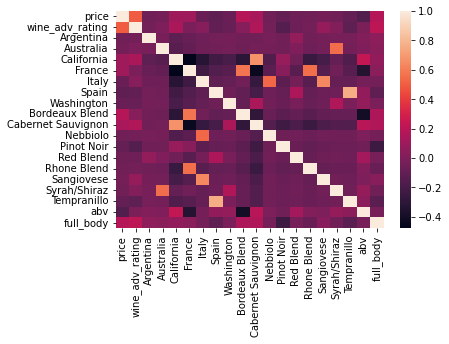

In [104]:
sns.heatmap(data.corr());

In [105]:
data.corr()

,price,wine_adv_rating,Argentina,Australia,California,France,Italy,Spain,Washington,Bordeaux Blend,Cabernet Sauvignon,Nebbiolo,Pinot Noir,Red Blend,Rhone Blend,Sangiovese,Syrah/Shiraz,Tempranillo,abv,full_body
price,1.000000,0.494062,-0.050751,-3.335568e-02,0.110551,0.104706,-0.075609,-0.110493,-0.076446,0.179606,0.139940,-0.048380,-0.094547,-6.398754e-02,-0.047713,-0.036737,-0.054548,-0.091385,-0.164422,0.175102
wine_adv_rating,0.494062,1.000000,-0.042544,-8.908231e-03,0.149388,-0.017583,0.023772,-0.103712,-0.081255,0.023830,0.167727,-0.040787,-0.152508,-6.039210e-02,-0.040369,0.072596,0.012022,-0.116048,-0.014107,0.209970
Argentina,-0.050751,-0.042544,1.000000,-2.460463e-02,-0.115915,-0.084781,-0.056545,-0.039538,-0.033635,-0.056136,-0.054589,-0.030046,-0.045327,6.575636e-02,-0.048932,-0.035867,-0.031280,-0.032475,0.007360,0.051943
Australia,-0.033356,-0.008908,-0.024605,1.000000e+00,-0.138562,-0.101345,-0.067593,-0.047263,-0.040207,-0.067104,-0.040545,-0.035916,-0.054182,5.931459e-18,-0.058492,-0.042875,0.544248,-0.038820,-0.003927,0.035179
California,0.110551,0.149388,-0.115915,-1.385617e-01,1.000000,-0.477445,-0.318437,-0.222661,-0.189419,-0.306002,0.665836,-0.169206,0.079856,-5.586865e-02,-0.253053,-0.201987,-0.093560,-0.166916,0.232005,0.060928
France,0.104706,-0.017583,-0.084781,-1.013448e-01,-0.477445,1.000000,-0.232907,-0.162856,-0.138542,0.571670,-0.431629,-0.123758,0.027030,-1.314259e-01,0.552034,-0.147734,-0.055093,-0.133762,-0.334500,0.032246
Italy,-0.075609,0.023772,-0.056545,-6.759303e-02,-0.318437,-0.232907,1.000000,-0.108618,-0.092402,-0.052585,-0.267192,0.531363,-0.124520,-3.571819e-02,-0.134423,0.634306,-0.085931,-0.089214,-0.033858,-0.038021
Spain,-0.110493,-0.103712,-0.039538,-4.726315e-02,-0.222661,-0.162856,-0.108618,1.000000,-0.064611,-0.107833,-0.201294,-0.057716,-0.087068,1.541987e-01,-0.093993,-0.068897,-0.060086,0.760404,0.063308,-0.110281
Washington,-0.076446,-0.081255,-0.033635,-4.020702e-02,-0.189419,-0.138542,-0.092402,-0.064611,1.000000,-0.091734,0.146318,-0.049099,-0.074070,-2.646962e-02,-0.079960,-0.058611,0.166903,-0.017945,0.069409,-0.015996
Bordeaux Blend,0.179606,0.023830,-0.056136,-6.710413e-02,-0.306002,0.571670,-0.052585,-0.107833,-0.091734,1.000000,-0.285797,-0.081945,-0.123619,-9.782024e-02,-0.133451,-0.097820,-0.085309,-0.088569,-0.406923,0.154877


In [106]:
#values for Australia & Red Blend seem particularly close to 0, let's try removing those? first Australia:
X = df3[['wine_adv_rating','Argentina','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']] 
y = df3.price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)

print(r_squared_train)
print(r_squared_val)

0.3478472856974284
0.13739321360021906


In [107]:
#remove Red Blend:
X = df3[['wine_adv_rating','Argentina','Australia','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']] 
y = df3.price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)

print(r_squared_train)
print(r_squared_val)

0.34721264820156383
0.13267872582483087


In [108]:
#removing Australia, Red Blend & Full Body
X = df3[['wine_adv_rating','Argentina','California','France','Italy','Spain','Washington','Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Rhone Blend',
          'Sangiovese','Syrah/Shiraz','Tempranillo','abv']] 
y = df3.price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)

print(r_squared_train)
print(r_squared_val)

0.3463934791130332
0.13449403201020904


With testing remove of different variables, R^2 score either stayed constant or went down on train data.
R^2 score increased on validation data when Australia was removed. Let's use this as the final model!

In [109]:
X = df3[['wine_adv_rating','Argentina','California','France','Italy','Spain','Washington',
         'Bordeaux Blend','Cabernet Sauvignon','Nebbiolo','Pinot Noir','Red Blend','Rhone Blend',
         'Sangiovese','Syrah/Shiraz','Tempranillo','abv','full_body']] 
y = df3.price

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
lr.fit(X_train, y_train)

r_squared_test = lr.score(X_test, y_test)
print(r_squared_test)
# 28% of variance is explained on test data!

0.27960844745556823


In [111]:
pred_y = lr.predict(X_test)

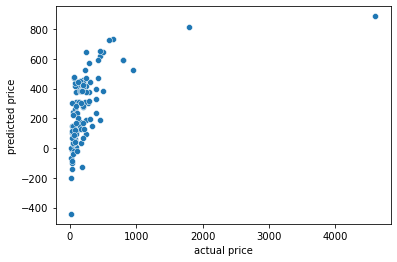

In [117]:
sns.scatterplot(x=y_test, y=pred_y)
plt.xlabel('actual price')
plt.ylabel('predicted price');